In [ ]:
# File system manangement
import time, psutil, os



# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 5.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=b5603f023086b3dbaf3284ec7ebd81af0b2d45c62deb4ce99968ff6eeaebd78a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.2 MB/s eta 0:00:00


In [ ]:
import time, psutil, os

### Runtime and memory usage

In [ ]:
# Recording the starting time, complemented with a stopping time check in the end to compute process runtime
start = time.time()

# Class representing the OS process and having memory_info() method to compute process memory usage
process = psutil.Process(os.getpid())

# DATA IMPORT AND DESCRIPTION

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/ecommerceDataset.csv',
    names = ['label', 'description']
)
data = data[['description', 'label']]

print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data

Memory usage        0.77 MB
Dataset shape    (50425, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,Household
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",Household
2,SAF 'UV Textured Modern Art Print Framed' Pain...,Household
3,"SAF Flower Print Framed Painting (Synthetic, 1...",Household
4,Incredible Gifts India Wooden Happy Birthday U...,Household
...,...,...
50420,Strontium MicroSD Class 10 8GB Memory Card (Bl...,Electronics
50421,CrossBeats Wave Waterproof Bluetooth Wireless ...,Electronics
50422,Karbonn Titanium Wind W4 (White) Karbonn Titan...,Electronics
50423,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",Electronics


In [ ]:
data['description'].iloc[1]

"SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones)."

# Missing values and duplicate observations

In [ ]:
print(pd.Series({"Number of observations with missing values": len(data) - len(data.dropna()),
                 "Number of duplicate observations": data.duplicated().sum()}).to_string())

Number of observations with missing values        1
Number of duplicate observations              22622


In [ ]:
data.dropna(inplace = True) # Dropping observations with missing values
data.drop_duplicates(inplace = True) # Dropping duplicate observations
data.reset_index(drop = True, inplace = True) # Resetting index

# Manual encoding of labels

In [ ]:
label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
data.replace({'label': label_dict}, inplace = True)

print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data

Memory usage        0.42 MB
Dataset shape    (27802, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# We split the dataset based on the target classes, in order to see how different textual attributes vary across classes.

In [ ]:
data_e = data[data['label'] == 0] # Electronics
data_h = data[data['label'] == 1] # Household
data_b = data[data['label'] == 2] # Books
data_c = data[data['label'] == 3] # Clothing & Accessories

## Class Frequencies

In [ ]:
import plotly.graph_objects as go

In [ ]:
values = np.array([len(data_e), len(data_h), len(data_b), len(data_c)])
labels = ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of class frequencies"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95))
fig.show()

## Number of Characters in desc.

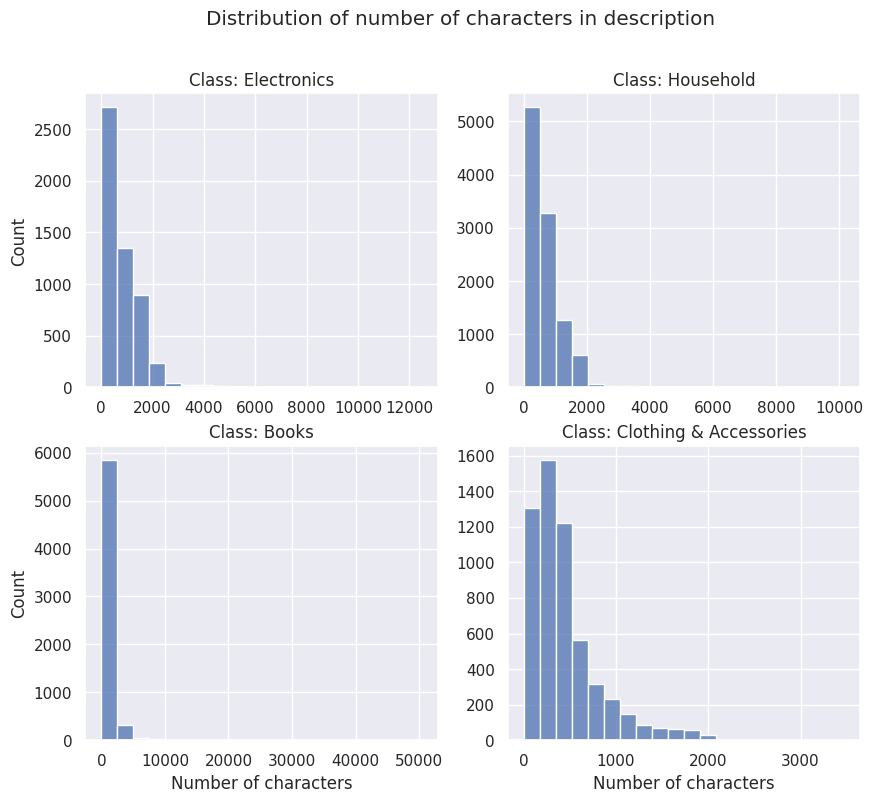

In [ ]:
# Distribution of number of characters in description
data_e_char = data_e['description'].str.len()
data_h_char = data_h['description'].str.len()
data_b_char = data_b['description'].str.len()
data_c_char = data_c['description'].str.len()

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_char, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_char, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_char, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_char, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of characters in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of characters")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

## Number of Words in desc.


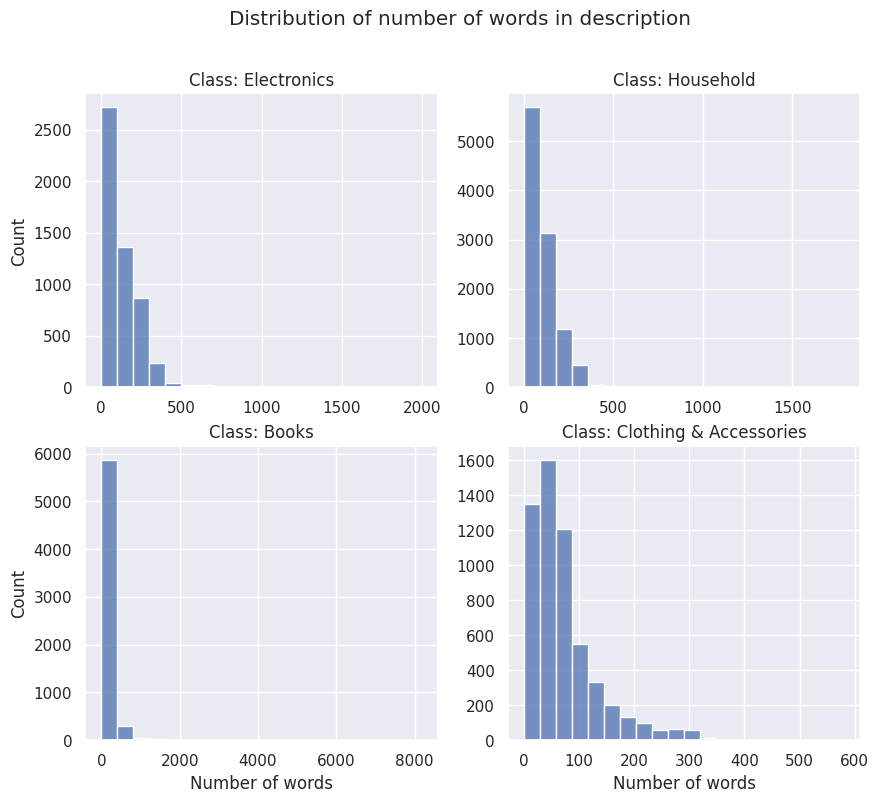

In [ ]:
data_e_word = data_e['description'].str.split().map(lambda x: len(x))
data_h_word = data_h['description'].str.split().map(lambda x: len(x))
data_b_word = data_b['description'].str.split().map(lambda x: len(x))
data_c_word = data_c['description'].str.split().map(lambda x: len(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_word, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_word, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_word, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_word, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of words in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of words")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

## Average Word-length in desc.

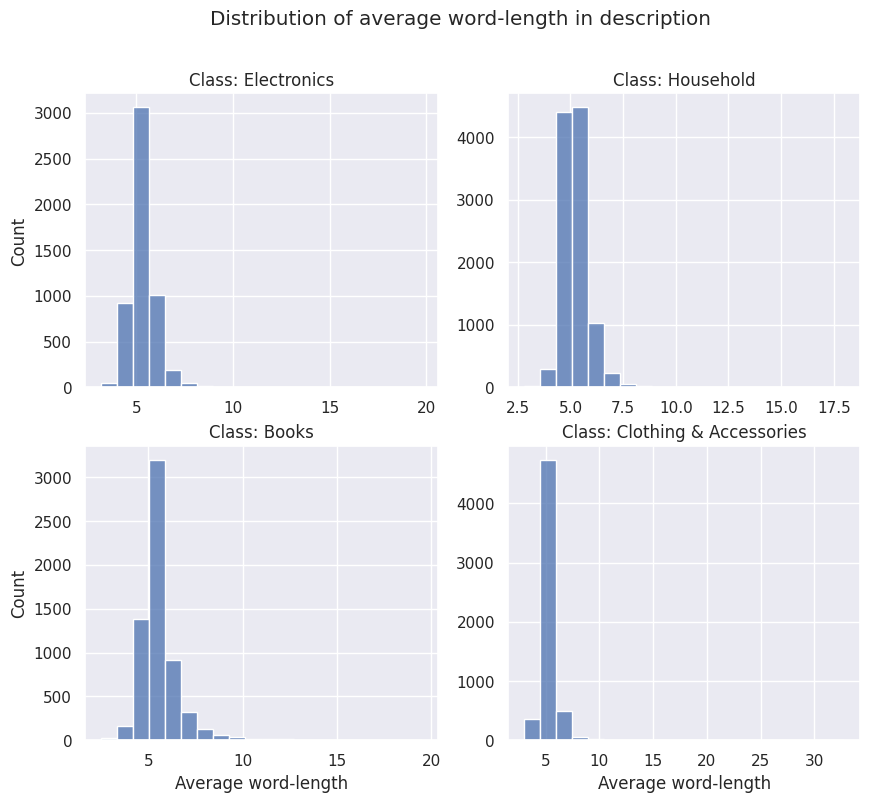

In [ ]:
data_e_avg = data_e['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_h_avg = data_h['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_b_avg = data_b['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_c_avg = data_c['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_avg, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_avg, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_avg, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_avg, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of average word-length in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Average word-length")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

# Train-Validation-Test Split

In [ ]:
from sklearn.model_selection import train_test_split, ParameterGrid

In [ ]:
# Feature-target split
X, y = data.drop('label', axis = 1), data['label']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Comparison of sizes of training set, validation set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of sizes of training set, validation set and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95))
fig.show()

In [ ]:
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 10.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d840e271cedc5aa5c28c709c58fc223dec9c336c5e57c12ceb91ff50bb7b4c99
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 83.7 MB/s eta 0:00:00


In [ ]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

## Convertion to Lowercase

In [ ]:
def convert_to_lowercase(text):
    return text.lower()

text = "USED TO CONVERT UPPERCASE WORD TO LOWERCASE"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: USED TO CONVERT UPPERCASE WORD TO LOWERCASE
Output: used to convert uppercase word to lowercase


## Removal of Whitespaces

In [ ]:
def remove_whitespace(text):
    return text.strip()

text = " \t Removes space \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 Removes space 	 
Output: Removes space


## Removal of Punctuations

In [ ]:
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = " [an] example? {of} removing@ ? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input:  [an] example? {of} removing@ ? punctuations!!!!
Output:  an example of removing  punctuations


## Removal of Unicode Characters
## removing html tags

In [ ]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

In [ ]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "removing emojis 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: removing emojis 😊
Output: removing emojis 


In [ ]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+"
    pattern = r"({})".format(http)
    return re.sub(pattern, "", text)

## Substitution of Acronyms

[**Acronyms**](https://en.wikipedia.org/wiki/Acronym) are shortened forms of phrases, generally found in informal writings.

In [ ]:
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')

print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict['fyi']))

Example: Original form of the acronym 'fyi' is 'for your information'


In [ ]:
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [ ]:
acronyms_list = list(acronyms_dict.keys())

# convert contractions in a text

In [ ]:
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()

    text_converted = " ".join(words)
    return text_converted

text = "btw you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))

Input: btw you've to fill in the details including dob
Output: by the way you've to fill in the details including date of birth


## Substitution of Contractions

A [**contraction**](https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions) is a shortened form of a word or a phrase, obtained by dropping one or more letters.

The contractions do not always have a one-to-one mapping with the original words.



In [ ]:
contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')

In [ ]:
# Dataframe of contractions
pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original']).head()

,contraction,original
0,'aight,alright
1,ain't,are not
2,amn't,am not
3,arencha,are not you
4,aren't,are not


In [ ]:
contractions_list = list(contractions_dict.keys())

In [ ]:
#  convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()

    text_converted = " ".join(words)
    return text_converted

text = "he's doin' fine"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))

Input: he's doin' fine
Output: he is doing fine


## Removal of Stop Words

Several words, primarily pronouns, prepositions, modal verbs etc, are identified not to have much effect on the classification procedure. These are called [**stop words**](https://en.wikipedia.org/wiki/Stop_word). To get rid of the unwanted contamination effect, we remove these words.

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


## Spelling Correction

In [ ]:
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "Im noat herre"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: Im noat herre
Output: Im not here


## Stemming and Lemmatization

[**Stemming**](https://en.wikipedia.org/wiki/Stemming) is the process of reducing the words to their root form or **stem**.



In [ ]:
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


The stems **introduc**, **lemmat** and **improv** are not actual words. [**Lemmatization**](https://en.wikipedia.org/wiki/Lemmatisation) offers a more sophisticated approach by utilizing a corpus to match root forms of the words. Unlike stemming, it uses the context in which a word is being used.

In [ ]:
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


## Discardment of Non-alphabetic Words

The non-alphabetic words are not numerous and create unnecessary diversions in the context of classifying tweets into non-disaster and disaster categories. Hence we discard these words.

In [ ]:
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is an ocean of thousands and 1000s of crowd"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is an ocean of thousands and 1000s of crowd
Output: It is an ocean of thousands and of crowd


## Removal of Additional Stop Words

Analyzing the data, we observe that several unnecessary words, which are not included in the ready-made set of **stop words**, keep appearing in the text corpus. We discard these words to remove noise in the classification procedure.

In [ ]:
# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

## Integration of the Processes

We integrate the text normalization processes in appropriate order. We have kept the **spelling correction** step commented out as it takes a massive amount of time to run on large datasets.

In [ ]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text)
    text = re.sub('\[.*?\]', '', text)
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = text_lemmatizer(text)
    text = discard_non_alpha(text)
    text = remove_additional_stopwords(text)
    return text

text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
Output: combine function single function apply product description


## Implementation on Product Description

In [ ]:
%%time
# Implementing text normalization
data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

data_train_norm['normalized description'] = data_train['description'].apply(text_normalizer)
data_val_norm['normalized description'] = data_val['description'].apply(text_normalizer)
data_test_norm['normalized description'] = data_test['description'].apply(text_normalizer)

data_train_norm['label'] = data_train['label']
data_val_norm['label'] = data_val['label']
data_test_norm['label'] = data_test['label']

data_train_norm

CPU times: user 9min 1s, sys: 1.95 s, total: 9min 3s
Wall time: 9min 27s


,normalized description,label
2389,udaipurcraft indian sheesham wood set nesting ...,Household
42943,koryo channel speaker system black pmpo,Electronics
35583,adro men army print cotton hoodie,Clothing & Accessories
34947,decore baby boy kurta pyjama display grac eful...,Clothing & Accessories
5055,shopais portable plastic egg carry holder carr...,Household
...,...,...
27640,bird bird instruction write life audio edition...,Books
14501,eureka forbes mini wet dry vacuum clean redbla...,Household
30727,transactional analysis psychotherapy,Books
47324,sricam wireless hd ip wifi cctv indoor securit...,Electronics


In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD

## Text Vectorization

In [ ]:
# Features and labels
X_train_norm, y_train = data_train_norm['normalized description'].tolist(), data_train_norm['label'].tolist()
X_val_norm, y_val = data_val_norm['normalized description'].tolist(), data_val_norm['label'].tolist()
X_test_norm, y_test = data_test_norm['normalized description'].tolist(), data_test_norm['label'].tolist()

In [ ]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

## TF-IDF Baseline Modeling

In [ ]:
# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [ ]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))

    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

## TF-IDF Hyperparameter Tuning

We perform **hyperparameter tuning** on the best performing baseline model.

In [ ]:
# Hyperparameter tuning for linear SVM
svm_classifier = svm.SVC()
params_svm = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100]
}

best_model_svm, best_params_svm, best_score_svm, count = svm_classifier, ParameterGrid(params_svm)[0], 0, 0
for g in ParameterGrid(params_svm):
    time_start = time.time()
    count += 1
    print(f"Gridpoint #{count}: {g}")
    svm_classifier.set_params(**g)
    svm_classifier.fit(X_train_tfidf, y_train)
    y_train_pred, y_val_pred = svm_classifier.predict(X_train_tfidf), svm_classifier.predict(X_val_tfidf)
    score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    time_stop = time.time()
    m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    print(" ")
    if score_val > best_score_svm:
        best_params_svm, best_score_svm = g, score_val

best_model_tfidf, best_params_tfidf, best_score_tfidf = svm.SVC(), best_params_svm, best_score_svm
best_model_tfidf.set_params(**best_params_tfidf)
print(f"Best model: {best_model_tfidf}")
print(" ")
print(f"Best parameters: {best_params_tfidf}")
print(f"Best validation accuracy: {best_score_tfidf}")

Gridpoint #1: {'C': 0.1, 'kernel': 'linear'}
Training accuracy: 0.9585016981085303, Validation accuracy: 0.951011503371678, Runtime: 12m23s
 
Gridpoint #2: {'C': 1, 'kernel': 'linear'}
Training accuracy: 0.9887205929745407, Validation accuracy: 0.9738199127330425, Runtime: 9m19s
 
Gridpoint #3: {'C': 10, 'kernel': 'linear'}
Training accuracy: 0.9983886561392201, Validation accuracy: 0.977984926616422, Runtime: 10m42s
 
Gridpoint #4: {'C': 100, 'kernel': 'linear'}
Training accuracy: 0.9996033615111927, Validation accuracy: 0.9777865926219754, Runtime: 9m36s
 
Best model: SVC(C=10, kernel='linear')
 
Best parameters: {'C': 10, 'kernel': 'linear'}
Best validation accuracy: 0.977984926616422


In [ ]:
# Relevant text normalization processes
def convert_to_lowercase(text): return text.lower()

contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')
contractions_list = list(contractions_dict.keys())

def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    return " ".join(words)

In [ ]:
# Text normalization for Word2Vec
for df in [data_train, data_val, data_test]:
    df['tokens'] = (df["description"].apply(convert_to_lowercase)
                                     .apply(convert_contractions)
                                     .apply(regexp.tokenize))
data_train[['tokens', 'label']]

,tokens,label
2389,"[udaipurcraft, indian, sheesham, wood, set, of...",Household
42943,"[koryo, kht4212fb, 2, 1, channel, speaker, sys...",Electronics
35583,"[adro, men's, army, printed, cotton, hoodies]",Clothing & Accessories
34947,"[decore, baby, boy's, kurta, pyjama, display, ...",Clothing & Accessories
5055,"[shopais, portable, plastic, egg, carry, holde...",Household
...,...,...
27640,"[bird, by, bird, some, instructions, on, writi...",Books
14501,"[eureka, forbes, mini, wet, and, dry, vacuum, ...",Household
30727,"[transactional, analysis, in, psychotherapy]",Books
47324,"[sricam, sp017, wireless, hd, ip, wi, fi, cctv...",Electronics


## Word Embedding

In [ ]:
import gensim.downloader as api
word2vec = api.load('word2vec-google-news-300')  # loads directly in Colab


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# Some useful functions for Word2Vec
def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis = 0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)

def plot_embedding(X, y):
    truncated_SVD = TruncatedSVD(n_components = 2)
    truncated_SVD.fit(X)
    scores = truncated_SVD.transform(X)
    color_mapper = {label:idx for idx, label in enumerate(set(y))}
    color_column = [color_mapper[label] for label in y]
    colors = ['red', 'blue', 'green', 'black']

    plt.scatter(scores[:, 0], scores[:, 1], s = 8, alpha = 0.8, c = y, cmap = matplotlib.colors.ListedColormap(colors))
    red_patch = mpatches.Patch(color = 'red', label = 'Electronics')
    blue_patch = mpatches.Patch(color = 'blue', label = 'Household')
    green_patch = mpatches.Patch(color = 'green', label = 'Books')
    black_patch = mpatches.Patch(color = 'black', label = 'Clothing & Accessories')
    plt.legend(handles = [red_patch, blue_patch, green_patch, black_patch], prop = {"size": 12})

In [ ]:
# Converting to Compressed Sparse Row matrix
X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
X_val_w2v = scipy.sparse.csr_matrix(X_val_embed)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

## Word2Vec Baseline Modeling

In [ ]:
# Summary of baseline models
score(X_train_w2v, y_train, X_val_w2v, y_val, names = names, models = models)

## Word2Vec Hyperparameter Tuning

We perform **hyperparameter tuning** on the best performing baseline model.

In [ ]:
# Hyperparameter tuning for XGBoost
xgb = XGBClassifier()
params_xgb = {
    'learning_rate': [0.03, 0.3],
    'min_child_weight': [0, 10],
    'n_estimators': [200],
    'reg_lambda': [1, 2],
    'seed': [40]
}

best_model_xgb, best_params_xgb, best_score_xgb, count = xgb, ParameterGrid(params_xgb)[0], 0, 0
for g in ParameterGrid(params_xgb):
    time_start = time.time()
    count += 1
    print(f"Gridpoint #{count}: {g}")
    xgb.set_params(**g)
    xgb.fit(X_train_w2v, y_train)
    y_train_pred, y_val_pred = xgb.predict(X_train_w2v), xgb.predict(X_val_w2v)
    score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    time_stop = time.time()
    m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    print(" ")
    if score_val > best_score_xgb:
        best_params_xgb, best_score_xgb = g, score_val

best_model_w2v, best_params_w2v, best_score_w2v = XGBClassifier(), best_params_xgb, best_score_xgb
best_model_w2v.set_params(**best_params_w2v)
print(f"Best model: {best_model_w2v}")
print(" ")
print(f"Best parameters: {best_params_w2v}")
print(f"Best validation accuracy: {best_score_w2v}")

# Final Prediction and Evaluation

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels, then transform the validation labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Now you can fit the model using encoded labels
for model in models:
    model_name = model.__class__.__name__
    print(f"Training {model_name}...")
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_val)

    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_val_encoded, y_pred))


Training KNeighborsClassifier...
KNeighborsClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.99      0.66      1854
           1       0.99      0.73      0.84      1412
           2       0.97      0.65      0.78      1704
           3       0.98      0.69      0.81      3098

    accuracy                           0.76      8068
   macro avg       0.86      0.77      0.77      8068
weighted avg       0.87      0.76      0.78      8068

Training DecisionTreeClassifier...
DecisionTreeClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1854
           1       0.96      0.94      0.95      1412
           2       0.93      0.91      0.92      1704
           3       0.93      0.95      0.94      3098

    accuracy                           0.94      8068
   macro avg       0.94      0.94      0.94      8068
weighted avg       0.94  

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1854
           1       0.91      0.90      0.91      1412
           2       0.86      0.73      0.79      1704
           3       0.70      0.91      0.79      3098

    accuracy                           0.80      8068
   macro avg       0.85      0.79      0.81      8068
weighted avg       0.82      0.80      0.80      8068



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encoding the target labels
y = label_encoder.fit_transform(data_train_norm['label'])

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Training data (assuming 'description' is the feature column)
X = data_train_norm['normalized description']

# TF-IDF Transformation
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Splitting dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Models to test
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

# Model training and evaluation
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val)  # Predict on validation data
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_val, y_pred))  # Display the classification report


KNeighborsClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.99      0.66      1854
           1       0.99      0.73      0.84      1412
           2       0.97      0.65      0.78      1704
           3       0.98      0.69      0.81      3098

    accuracy                           0.76      8068
   macro avg       0.86      0.77      0.77      8068
weighted avg       0.87      0.76      0.78      8068

DecisionTreeClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1854
           1       0.96      0.94      0.95      1412
           2       0.93      0.91      0.92      1704
           3       0.93      0.95      0.94      3098

    accuracy                           0.94      8068
   macro avg       0.94      0.94      0.94      8068
weighted avg       0.94      0.94      0.94      8068

XGBClassifier Classification Report:



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1854
           1       0.91      0.90      0.91      1412
           2       0.86      0.73      0.79      1704
           3       0.70      0.91      0.79      3098

    accuracy                           0.80      8068
   macro avg       0.85      0.79      0.81      8068
weighted avg       0.82      0.80      0.80      8068



In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Train Word2Vec model
def train_word2vec(text_data):
    sentences = [text.split() for text in text_data]
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Feature extraction from Word2Vec model
def get_word2vec_features(text_data, model):
    features = []
    for text in text_data:
        tokens = text.split()
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if len(vectors) > 0:
            features.append(np.mean(vectors, axis=0))
        else:
            features.append(np.zeros(model.vector_size))  # Handling case where no tokens are found in the model
    return np.array(features)

# Assuming 'normalized description' and 'label' are the columns in the dataset
X = data_train_norm['normalized description']
y = data_train_norm['label']

# Label Encoding (Converting string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels as integers

# Splitting dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Word2Vec model on training data
word2vec_model = train_word2vec(X_train)

# Get Word2Vec features for training and validation
X_train_word2vec = get_word2vec_features(X_train, word2vec_model)
X_val_word2vec = get_word2vec_features(X_val, word2vec_model)

# Models to test (same as TF-IDF)
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

# Model training and evaluation for Word2Vec features
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_word2vec, y_train)
    y_pred = model.predict(X_val_word2vec)
    print(f"{model_name} Classification Report for Word2Vec:\n")
    print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))


KNeighborsClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.96      0.93      0.95      1854
Clothing & Accessories       0.95      0.98      0.96      1412
           Electronics       0.94      0.94      0.94      1704
             Household       0.95      0.96      0.95      3098

              accuracy                           0.95      8068
             macro avg       0.95      0.95      0.95      8068
          weighted avg       0.95      0.95      0.95      8068

DecisionTreeClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.95      0.95      0.95      1854
Clothing & Accessories       0.95      0.94      0.95      1412
           Electronics       0.93      0.91      0.92      1704
             Household       0.94      0.95      0.94      3098

              accuracy                       

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.94      0.89      0.91      1854
Clothing & Accessories       0.92      0.93      0.93      1412
           Electronics       0.83      0.86      0.84      1704
             Household       0.89      0.89      0.89      3098

              accuracy                           0.89      8068
             macro avg       0.89      0.89      0.89      8068
          weighted avg       0.89      0.89      0.89      8068



KNeighborsClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.96      0.93      0.94      1854
Clothing & Accessories       0.96      0.97      0.96      1412
           Electronics       0.94      0.94      0.94      1704
             Household       0.95      0.96      0.95      3098

              accuracy                           0.95      8068
             macro avg       0.95      0.95      0.95      8068
          weighted avg       0.95      0.95      0.95      8068



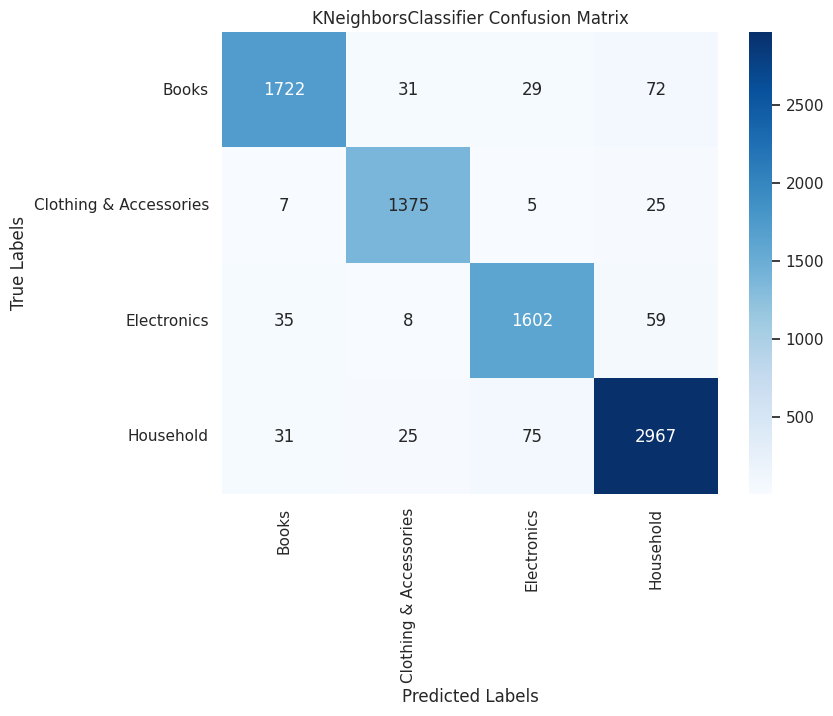

DecisionTreeClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.95      0.94      0.94      1854
Clothing & Accessories       0.94      0.94      0.94      1412
           Electronics       0.92      0.92      0.92      1704
             Household       0.94      0.94      0.94      3098

              accuracy                           0.94      8068
             macro avg       0.94      0.94      0.94      8068
          weighted avg       0.94      0.94      0.94      8068



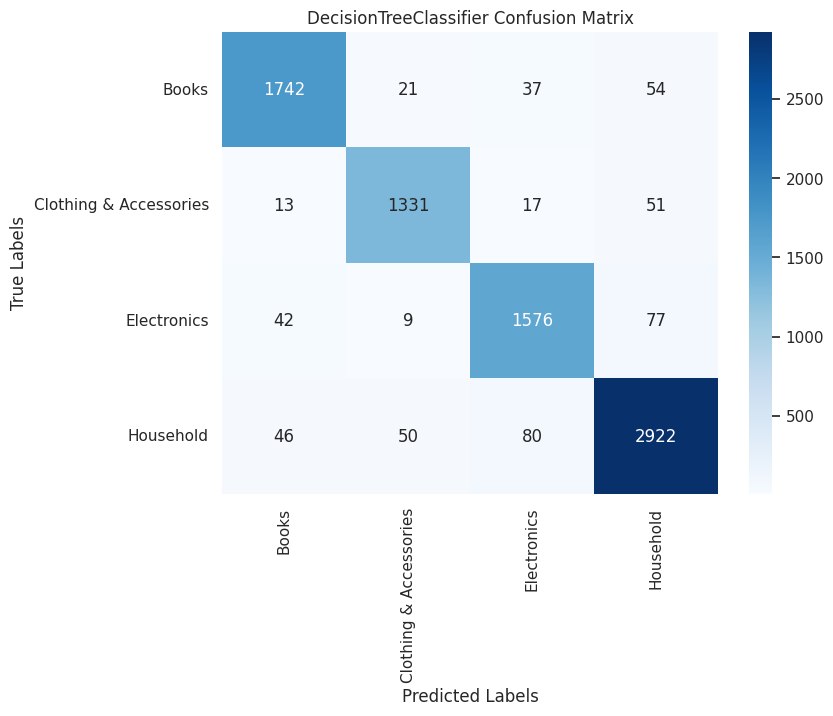

XGBClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.98      0.96      0.97      1854
Clothing & Accessories       0.98      0.98      0.98      1412
           Electronics       0.96      0.95      0.96      1704
             Household       0.96      0.98      0.97      3098

              accuracy                           0.97      8068
             macro avg       0.97      0.97      0.97      8068
          weighted avg       0.97      0.97      0.97      8068



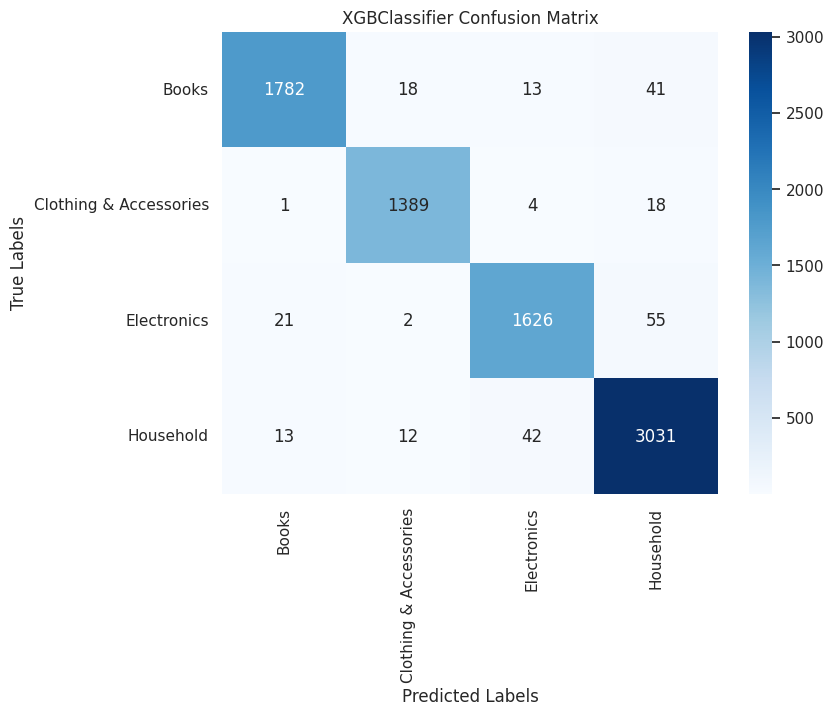

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.92      0.89      0.91      1854
Clothing & Accessories       0.92      0.94      0.93      1412
           Electronics       0.82      0.86      0.84      1704
             Household       0.90      0.88      0.89      3098

              accuracy                           0.89      8068
             macro avg       0.89      0.89      0.89      8068
          weighted avg       0.89      0.89      0.89      8068



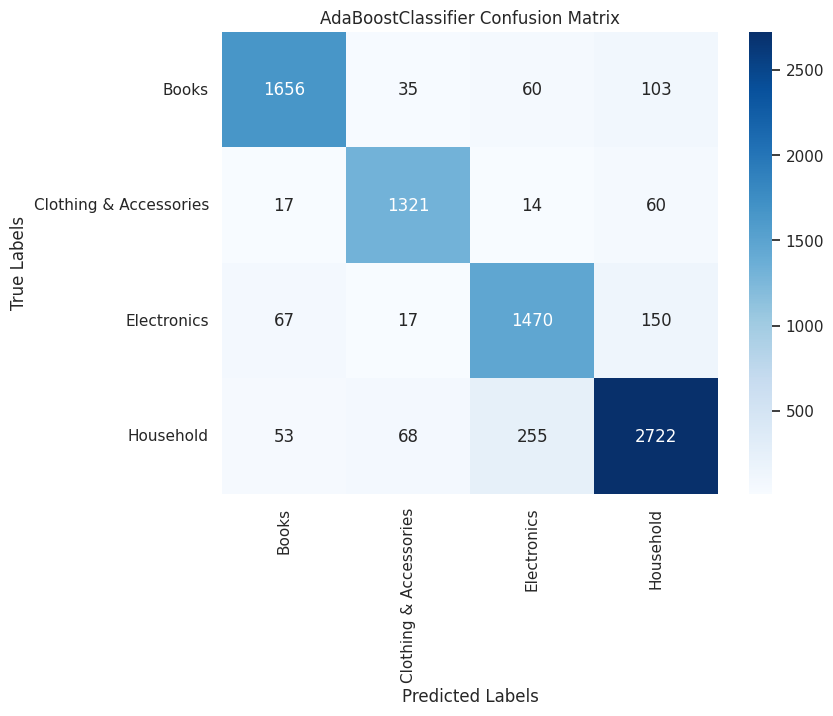

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Train Word2Vec model
def train_word2vec(text_data):
    sentences = [text.split() for text in text_data]
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Feature extraction from Word2Vec model
def get_word2vec_features(text_data, model):
    features = []
    for text in text_data:
        tokens = text.split()
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if len(vectors) > 0:
            features.append(np.mean(vectors, axis=0))
        else:
            features.append(np.zeros(model.vector_size))  # Handling case where no tokens are found in the model
    return np.array(features)

# Assuming 'normalized description' and 'label' are the columns in the dataset
X = data_train_norm['normalized description']
y = data_train_norm['label']

# Label Encoding (Converting string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels as integers

# Splitting dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Word2Vec model on training data
word2vec_model = train_word2vec(X_train)

# Get Word2Vec features for training and validation
X_train_word2vec = get_word2vec_features(X_train, word2vec_model)
X_val_word2vec = get_word2vec_features(X_val, word2vec_model)

# Models to test (same as TF-IDF)
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

# Model training and evaluation for Word2Vec features
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_word2vec, y_train)
    y_pred = model.predict(X_val_word2vec)
    print(f"{model_name} Classification Report for Word2Vec:\n")
    print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


KNeighborsClassifier Classification Report for TF-IDF:

                        precision    recall  f1-score   support

                 Books       0.49      0.99      0.66      1854
Clothing & Accessories       0.99      0.73      0.84      1412
           Electronics       0.97      0.65      0.78      1704
             Household       0.98      0.69      0.81      3098

              accuracy                           0.76      8068
             macro avg       0.86      0.76      0.77      8068
          weighted avg       0.87      0.76      0.77      8068



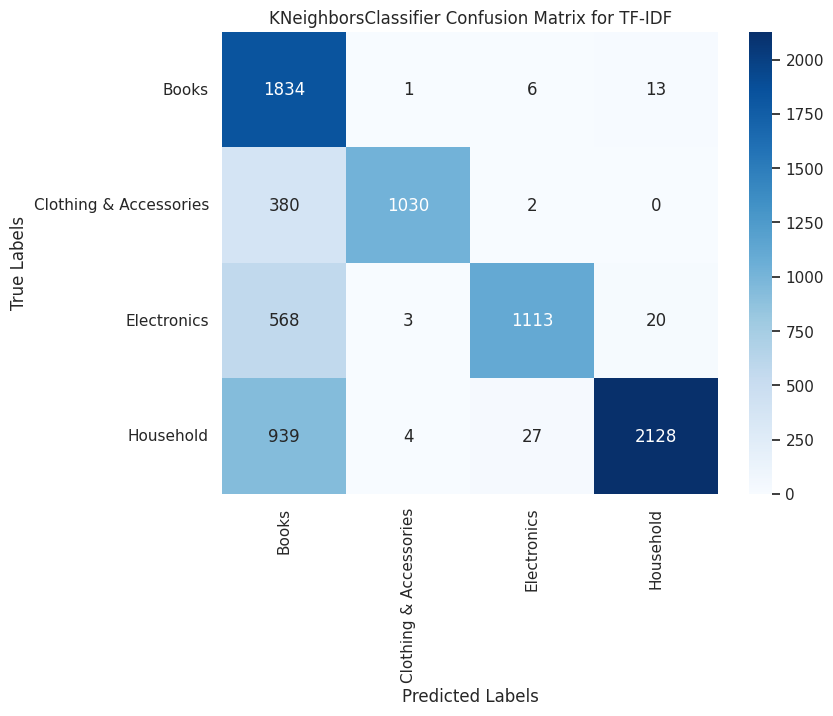

KNeighborsClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.96      0.93      0.94      1854
Clothing & Accessories       0.95      0.97      0.96      1412
           Electronics       0.94      0.94      0.94      1704
             Household       0.95      0.96      0.95      3098

              accuracy                           0.95      8068
             macro avg       0.95      0.95      0.95      8068
          weighted avg       0.95      0.95      0.95      8068



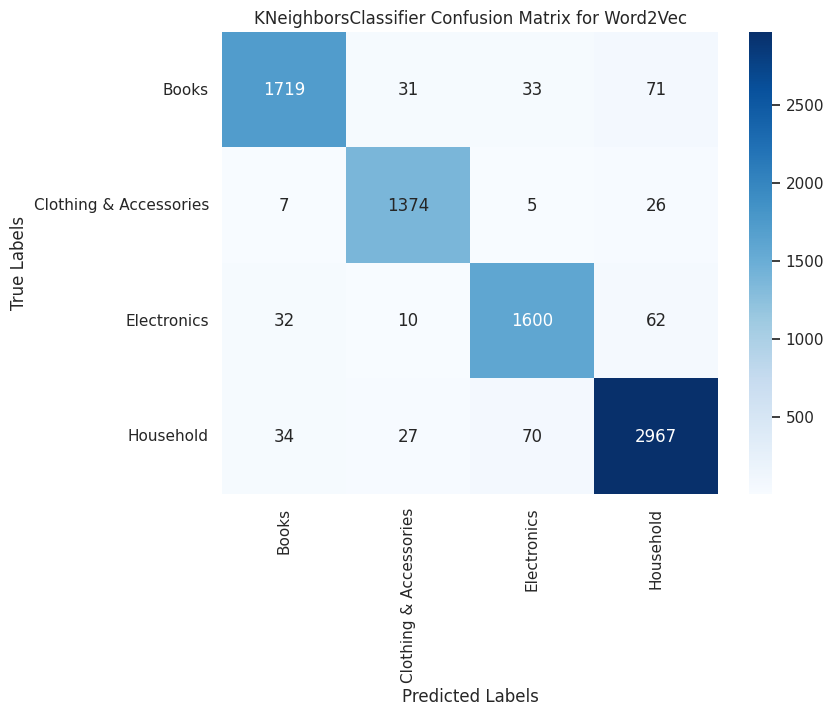

DecisionTreeClassifier Classification Report for TF-IDF:

                        precision    recall  f1-score   support

                 Books       0.95      0.95      0.95      1854
Clothing & Accessories       0.95      0.94      0.95      1412
           Electronics       0.93      0.91      0.92      1704
             Household       0.93      0.95      0.94      3098

              accuracy                           0.94      8068
             macro avg       0.94      0.94      0.94      8068
          weighted avg       0.94      0.94      0.94      8068



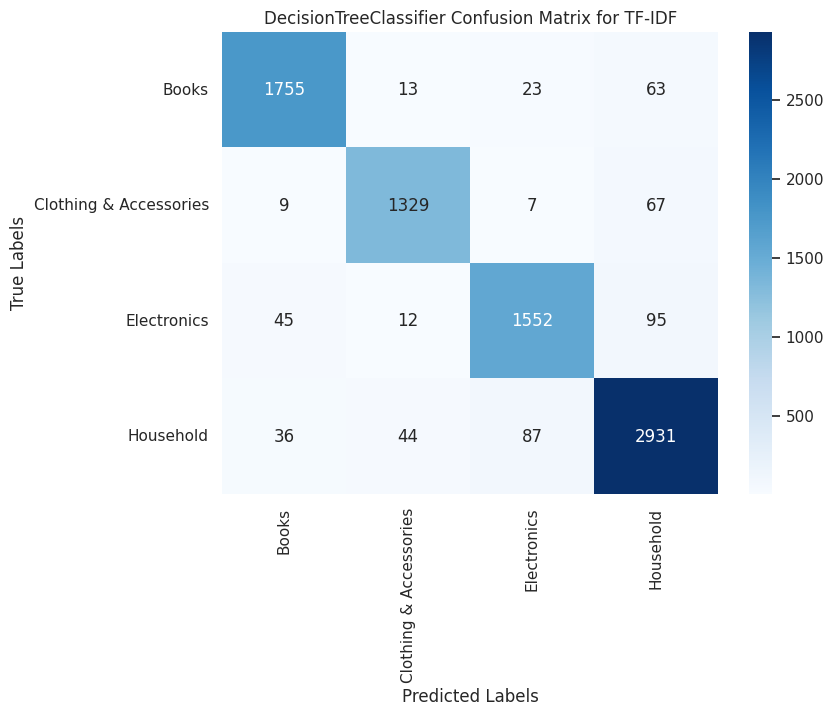

DecisionTreeClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.94      0.94      0.94      1854
Clothing & Accessories       0.94      0.93      0.94      1412
           Electronics       0.92      0.92      0.92      1704
             Household       0.94      0.94      0.94      3098

              accuracy                           0.94      8068
             macro avg       0.93      0.93      0.93      8068
          weighted avg       0.94      0.94      0.94      8068



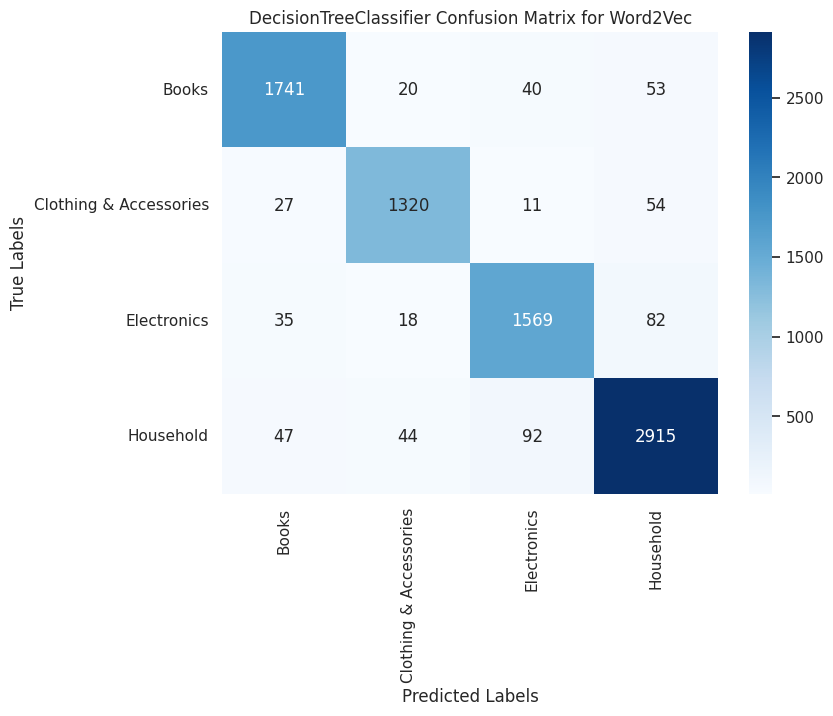

XGBClassifier Classification Report for TF-IDF:

                        precision    recall  f1-score   support

                 Books       0.94      0.95      0.94      1854
Clothing & Accessories       0.97      0.97      0.97      1412
           Electronics       0.97      0.92      0.94      1704
             Household       0.94      0.96      0.95      3098

              accuracy                           0.95      8068
             macro avg       0.95      0.95      0.95      8068
          weighted avg       0.95      0.95      0.95      8068



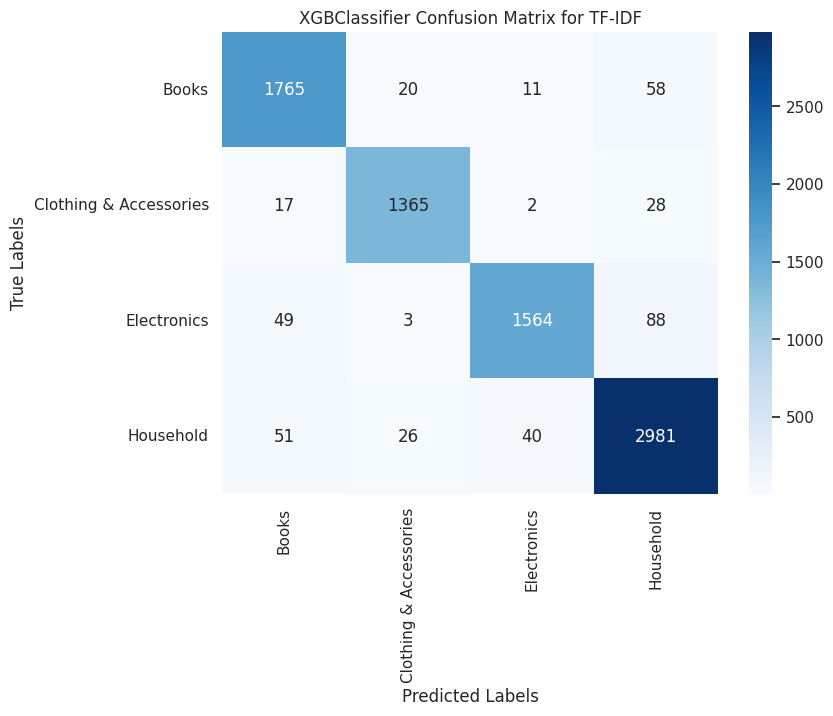

XGBClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.98      0.96      0.97      1854
Clothing & Accessories       0.98      0.98      0.98      1412
           Electronics       0.97      0.95      0.96      1704
             Household       0.96      0.98      0.97      3098

              accuracy                           0.97      8068
             macro avg       0.97      0.97      0.97      8068
          weighted avg       0.97      0.97      0.97      8068



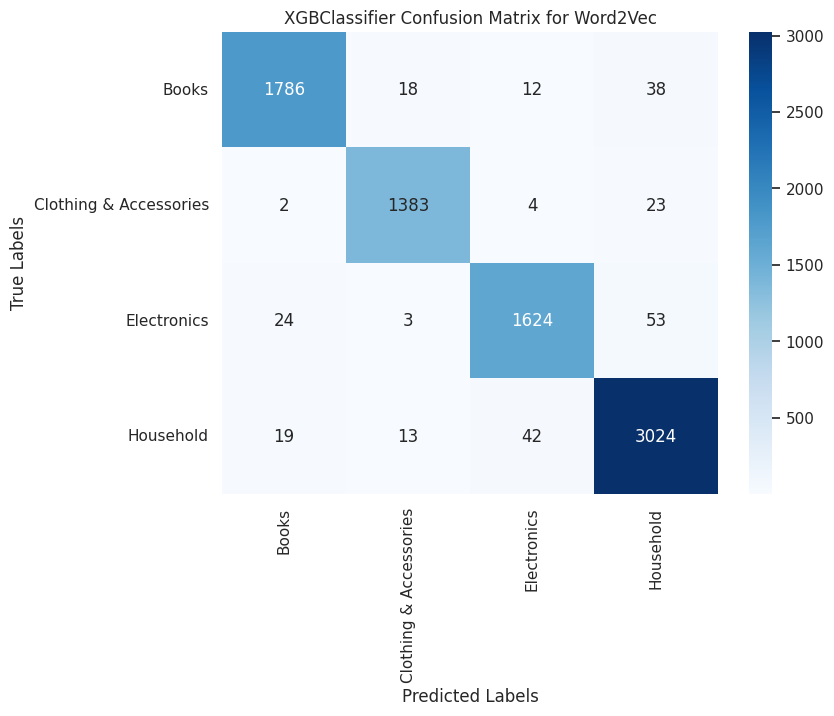

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier Classification Report for TF-IDF:

                        precision    recall  f1-score   support

                 Books       0.93      0.62      0.74      1854
Clothing & Accessories       0.91      0.90      0.91      1412
           Electronics       0.85      0.71      0.78      1704
             Household       0.70      0.90      0.79      3098

              accuracy                           0.80      8068
             macro avg       0.85      0.78      0.80      8068
          weighted avg       0.82      0.80      0.79      8068



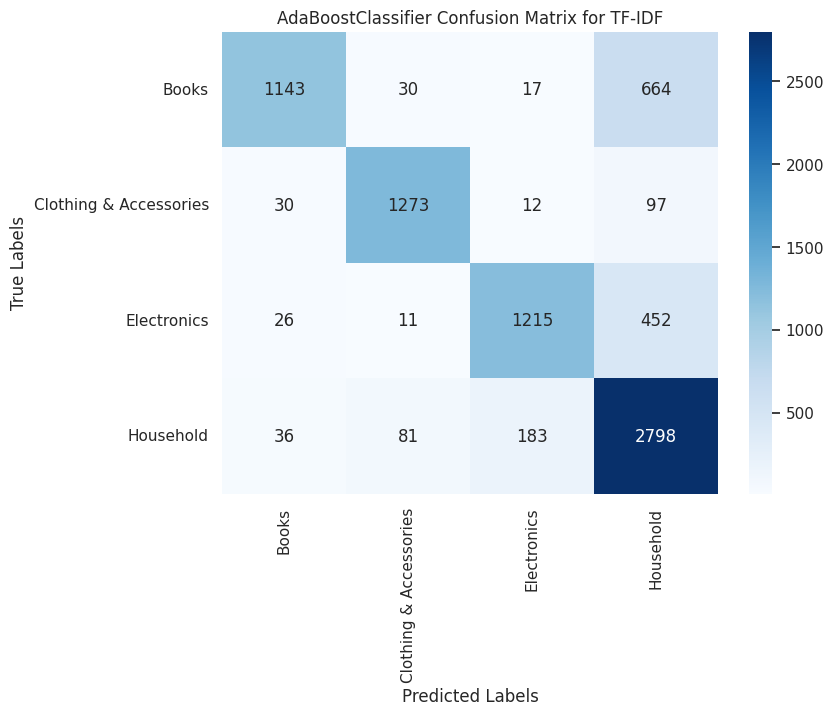

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier Classification Report for Word2Vec:

                        precision    recall  f1-score   support

                 Books       0.94      0.89      0.91      1854
Clothing & Accessories       0.91      0.94      0.92      1412
           Electronics       0.82      0.87      0.84      1704
             Household       0.89      0.88      0.89      3098

              accuracy                           0.89      8068
             macro avg       0.89      0.89      0.89      8068
          weighted avg       0.89      0.89      0.89      8068



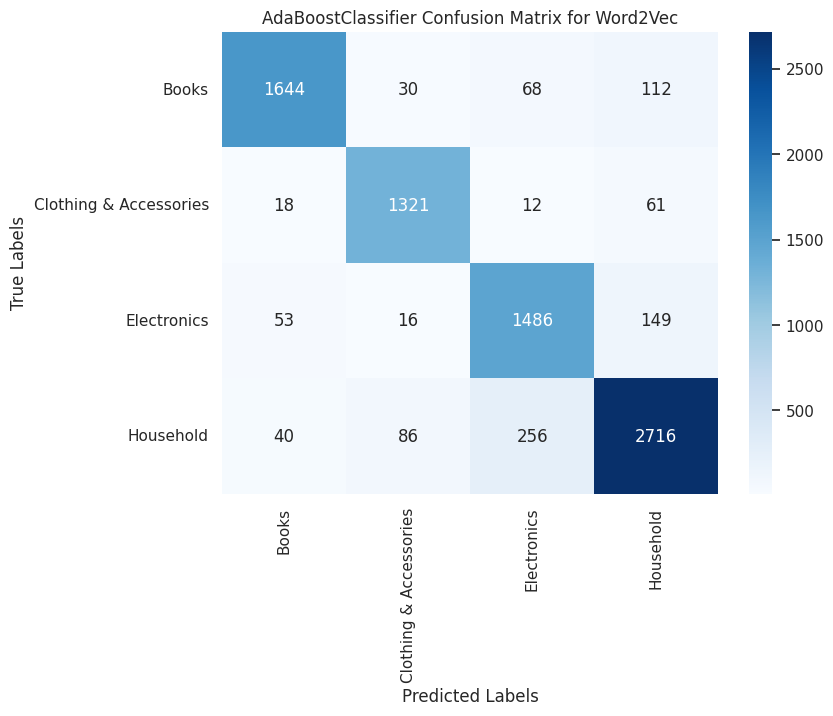

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Train Word2Vec model
def train_word2vec(text_data):
    sentences = [text.split() for text in text_data]
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Feature extraction from Word2Vec model
def get_word2vec_features(text_data, model):
    features = []
    for text in text_data:
        tokens = text.split()
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if len(vectors) > 0:
            features.append(np.mean(vectors, axis=0))
        else:
            features.append(np.zeros(model.vector_size))  # Handling case where no tokens are found in the model
    return np.array(features)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Assuming 'normalized description' and 'label' are the columns in the dataset
X = data_train_norm['normalized description']
y = data_train_norm['label']

# Label Encoding (Converting string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels as integers

# Splitting dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# TF-IDF Transformation
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Train Word2Vec model on training data
word2vec_model = train_word2vec(X_train)

# Get Word2Vec features for training and validation
X_train_word2vec = get_word2vec_features(X_train, word2vec_model)
X_val_word2vec = get_word2vec_features(X_val, word2vec_model)

# Models to test (same as TF-IDF)
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

# Model training and evaluation for both TF-IDF and Word2Vec features
for model in models:
    model_name = model.__class__.__name__

    # TF-IDF Model
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_val_tfidf)
    print(f"{model_name} Classification Report for TF-IDF:\n")
    print(classification_report(y_val, y_pred_tfidf, target_names=label_encoder.classes_))

    # Confusion Matrix for TF-IDF
    cm_tfidf = confusion_matrix(y_val, y_pred_tfidf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"{model_name} Confusion Matrix for TF-IDF")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Word2Vec Model
    model.fit(X_train_word2vec, y_train)
    y_pred_word2vec = model.predict(X_val_word2vec)
    print(f"{model_name} Classification Report for Word2Vec:\n")
    print(classification_report(y_val, y_pred_word2vec, target_names=label_encoder.classes_))

    # Confusion Matrix for Word2Vec
    cm_word2vec = confusion_matrix(y_val, y_pred_word2vec)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_word2vec, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"{model_name} Confusion Matrix for Word2Vec")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
